In [24]:
import lifelines as lf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\pedro\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# LEITURA ARQUIVO EQUIPAMENTOS

In [14]:
caminho = r'C:/Users/pedro/Desktop/Curso Python/'
arquivo = pd.read_csv(caminho + 'comparacao.csv', sep= ';')

In [15]:
arquivo.head()

,DATA-INSTALACAO,DATA-RETIRADA,TIPO-LOCALIZACAO,ANO-FAB,DESC-REGIAO,VIDA-UTIL,FALHOU?,FALHOU?2,TECNOLOGIA,MODELO
0,2011-10-05,2020-11-14,UB,2011,CENTRO,3328.0,C,0,ELETROMECANICO,A
1,2011-04-11,2020-08-05,UB,2011,CENTRO,3404.0,C,0,ELETROMECANICO,A
2,2016-04-28,2020-07-30,UB,2002,CENTRO,1554.0,C,0,ELETROMECANICO,A
3,2012-04-26,2020-07-27,UB,2012,CENTRO,3014.0,C,0,ELETROMECANICO,A
4,2012-04-23,2020-07-13,UB,2012,CENTRO,3003.0,C,0,ELETROMECANICO,A


- `DATA-INSTALACAO`: data em que o equipamento foi instalado
- `DATA-RETIRADA`: data em que o equipamento foi retirado
- `TIPO-LOCALIZACAO`: local em que o equipamento estava instalado (URBANO ou RURAL)
- `ANO-FAB`: ano em que o equipamento foi fabricado
- `DESC-REGIAO`: região fictícia do equipamento
- `VIDA-UTIL`: tempo em que o equipamento permaneceu instalado, em DIAS
- `FALHOU?`: equipamento falhou ou não. F -> FALHOU; C -> CENSURA
- `FALHOU?2`: FALHOU -> 1; CENSURA -> 0
- `TECNOLOGIA`: tipo do equipamento. ELETRONICO ou ELETROMECANICO
- `MODELO`: modelo ficticio do equipamento

# TRANSFORMAÇÃO

In [21]:
# Verificar se há algum item faltante

arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65386 entries, 0 to 65385
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATA-INSTALACAO   65386 non-null  object
 1   DATA-RETIRADA     65386 non-null  object
 2   TIPO-LOCALIZACAO  65386 non-null  object
 3   ANO-FAB           65386 non-null  int64 
 4   DESC-REGIAO       65386 non-null  object
 5   VIDA-UTIL         65386 non-null  int32 
 6   FALHOU?           65386 non-null  object
 7   FALHOU?2          65386 non-null  int64 
 8   TECNOLOGIA        65386 non-null  object
 9   MODELO            65386 non-null  object
dtypes: int32(1), int64(2), object(7)
memory usage: 4.7+ MB


In [18]:
# VIDA-UTIL está em dias. Transformaremos para ANOS

arquivo['VIDA-UTIL'] = (arquivo['VIDA-UTIL']/365).astype(int)

# MODELO

In [25]:
# Criação do modelo de Kaplan-Meier

km_fitter = lf.KaplanMeierFitter()

O modelo A possui um tempo médio de vida de 12.0 anos


O modelo B possui um tempo médio de vida de 10.0 anos


O modelo C possui um tempo médio de vida de 16.0 anos


O modelo D possui um tempo médio de vida de 6.0 anos




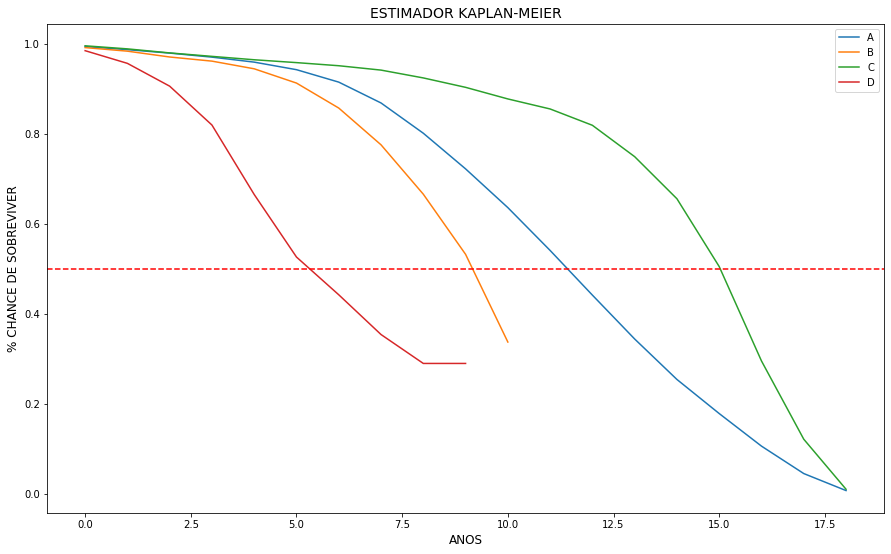

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(15,9))
for i in arquivo['MODELO'].unique():
    tempo = arquivo['VIDA-UTIL'].loc[arquivo['MODELO'] == i]
    evento = arquivo['FALHOU?2'].loc[arquivo['MODELO'] == i]
    
    km_fitter.fit(tempo, event_observed = evento, label = i)
    km_fitter.survival_function_.plot(ax = axes)
    axes.set_title('ESTIMADOR KAPLAN-MEIER',fontsize = 14)
    axes.set_xlabel('ANOS', fontsize = 12)
    axes.set_ylabel('% CHANCE DE SOBREVIVER', fontsize = 12)
    
    print('O modelo {} possui um tempo médio de vida de {} anos\n\n'.format(i,round(km_fitter.median_survival_time_,1)))
axes.axhline(0.5, color = 'red', linestyle = '--')
plt.show()